## Laboratorium 4

### Cel ćwiczenia
Celem ćwiczenia jest zastosowanie metody selekcji cech w klasyfikacji liści, a następnie przeprowadzenie klasyfikacji za pomocą klasyfikatora *k*NN.
Dodatkowo należy wyświetlić wyniki klasyfikacji w postaci macierzy pomyłek.

### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab[xx].ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```



### Zadanie 1

* Wybierz 10 pierwszych gatunków liści (będziesz je używać w kolejnych zadaniach) o identyfikatorach: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.
* Znormalizuj dane w zakresie 0-1.

### Zadanie 2
* Przeprowadź selekcję cech.
> Możesz wykorzystać bibliotekę [scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html) (np. [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)).
* Dla każdej liczby cech (1-14) przeprowadz selekcje cech. Nastepnie wykonaj klasyfikacje klasyfikatorem *k*NN i znajdź optymalne *k*.
* Wyświetl wykres, gdzie na osi X znajduje się liczba cech, a na osi Y najwyższa osiągnięta dokładność (*accuracy*).
* Podaj dla jakiej liczby cech (i dla których cech) oraz dla jakiego *k* osiągnąłeś najlepszy wynik (*accuracy*).

### Zadanie 3
* Wyświetl tablicę pomyłek.

> Podpowiedź: Do wyświetlenia tablicy pomyłek możesz użyć funkcji [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) oraz [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) z biblioteki `sklearn`.

**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład czego nie robić (na podstawie tablicy pomyłek):

**Źle** (kolumny ani wiersze nie są opisane):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```



## Zadanie 1

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

classes = list(range(1,11))

train = train[np.isin(train[:, 0], classes)]
test = test[np.isin(test[:, 0], classes)]
y_train = train[:,0]
X_train = train[:,2:]
y_test = test[:,0]
X_test = test[:,2:]

train_scaler = MinMaxScaler()
train_scaler.fit(X_train)

X_train = train_scaler.transform(X_train)
X_test = train_scaler.transform(X_test)

## Zadanie 2

(671, 5)
1 features: Best accuracy: 36.94% for k = 9
2 features: Best accuracy: 70.60% for k = 10
3 features: Best accuracy: 70.99% for k = 6
4 features: Best accuracy: 73.31% for k = 8
5 features: Best accuracy: 80.27% for k = 8
6 features: Best accuracy: 80.85% for k = 7
7 features: Best accuracy: 75.05% for k = 10
8 features: Best accuracy: 76.21% for k = 10
9 features: Best accuracy: 75.82% for k = 1
10 features: Best accuracy: 75.82% for k = 4
11 features: Best accuracy: 76.79% for k = 4
12 features: Best accuracy: 78.92% for k = 10
13 features: Best accuracy: 80.66% for k = 9
14 features: Best accuracy: 81.04% for k = 10
The best accuracy: 81.04% for 14 features. The best k = 10


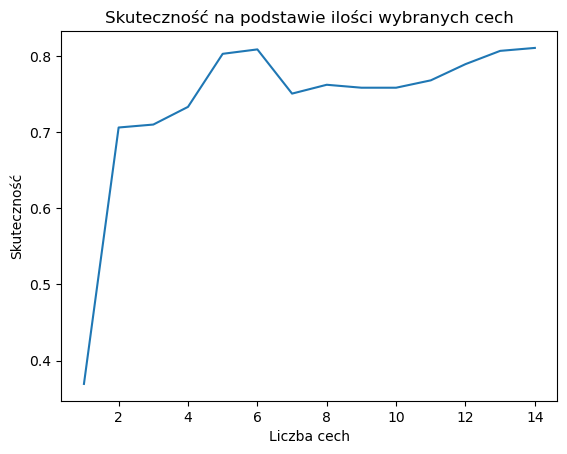

In [7]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_new = SelectKBest(k=5).fit_transform(X_train, y_train)
print(X_new.shape)

accuracies = []
for i in range(1,15):
    selector = SelectKBest(k=i)
    X_train_new = selector.fit_transform(X_train, y_train)
    features = selector.get_feature_names_out(range(0,14)) ## wyświetla nazwy wybranych cech    
    X_test_new = X_test[:, list(features)]
    
    best_k = 0
    best_acc = 0
    for k in range(1,11):
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train_new, y_train)
        
        predictions = neigh.predict(X_test_new)
        accuracy = accuracy_score(y_test, predictions)
        if accuracy > best_acc:
            best_acc = accuracy
            best_k = k
        # print(f"Features: {i}, kNN: {k}: Acc: {accuracy*100:.2f}%")
    accuracies.append(best_acc)
    print(f"{i} features: Best accuracy: {best_acc*100:.2f}% for k = {best_k}")

# print(accuracies)
print(f"The best accuracy: {max(accuracies)*100:.2f}% for {accuracies.index(max(accuracies)) + 1} features. The best k = {best_k}")

plt.plot(list(range(1,15)), accuracies)
plt.xlabel('Liczba cech')
plt.ylabel('Skuteczność')
plt.title('Skuteczność na podstawie ilości wybranych cech')
plt.show()    

## Zadanie 3

[0 1 2 3 4 5 6 7 8 9 10 11 12 13]


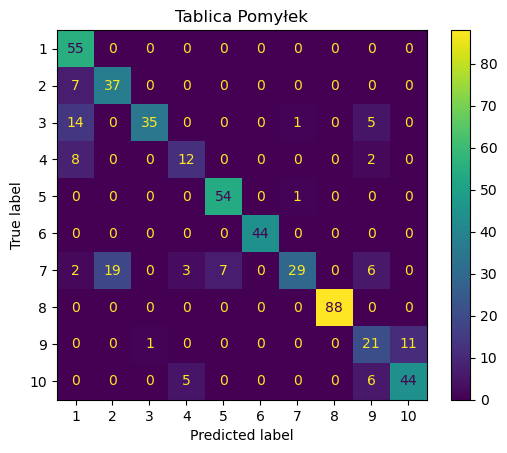

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

selector = SelectKBest(k=14)
X_train_new = selector.fit_transform(X_train, y_train)
features = selector.get_feature_names_out(range(0,14)) ## wyświetla nazwy wybranych cech 
print(features)
X_test_new = X_test[:, list(features)]

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train_new, y_train)

predictions = neigh.predict(X_test_new)
cm = confusion_matrix(y_test, predictions)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot()
plt.title("Tablica Pomyłek")
plt.show()